In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetes1.csv')  # loading the data set
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.shape # give number of rows and columns

(768, 9)

In [4]:
data.describe() # summary of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().values.any() # check null value in dataset data

False

In [6]:
data['Outcome'].value_counts()  # count the values of Outcome column 0->500 and 1-->268

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
print("CHECKING ZERO VALUE'S ONLY FOR FEATURES")  # tells number of zeros in all features
print("The number of row's having zero value in Pregnancies are:",len(data[data['Pregnancies']==0]))
print("The number of row's having zero value in Glucose are:",len(data[data['Glucose']==0]))
print("The number of row's having zero value in BloodPressure are:",len(data[data['BloodPressure']==0]))
print("The number of row's having zero value in SkinThickness are:",len(data[data['SkinThickness']==0]))
print("The number of row's having zero value in Insulin are:",len(data[data['Insulin']==0]))
print("The number of row's having zero value in BMI are:",len(data[data['BMI']==0]))
print("The number of row's having zero value in DiabetesPedigreeFunction are:",len(data[data['DiabetesPedigreeFunction']==0]))
print("The number of row's having zero value in Age are:",len(data[data['Age']==0]))

CHECKING ZERO VALUE'S ONLY FOR FEATURES
The number of row's having zero value in Pregnancies are: 111
The number of row's having zero value in Glucose are: 5
The number of row's having zero value in BloodPressure are: 35
The number of row's having zero value in SkinThickness are: 227
The number of row's having zero value in Insulin are: 374
The number of row's having zero value in BMI are: 11
The number of row's having zero value in DiabetesPedigreeFunction are: 0
The number of row's having zero value in Age are: 0


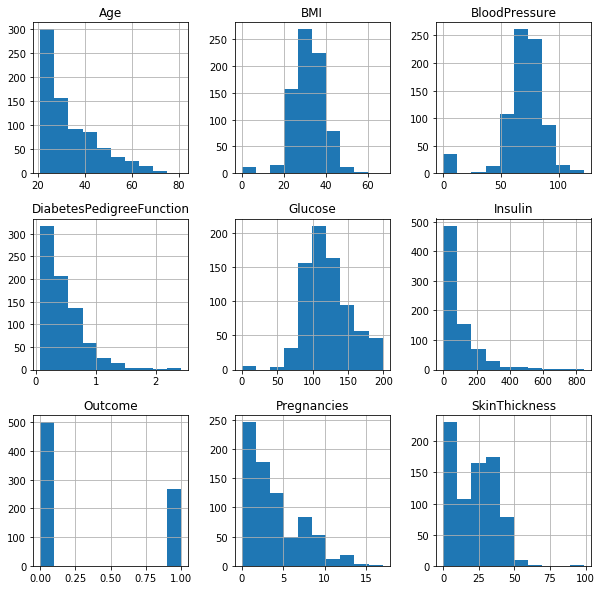

In [46]:
data.hist(figsize=(10,10))     # Data visualisation tells the zero, max, min, mean values in featues through histogram
plt.show()

### Replacing all zero values with the mean() of the column

In [ ]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data.describe()

In [ ]:
import matplotlib.pyplot as plt # plotting the both bar graph and pie chart.

plt.subplots(figsize=(5,5))
data['Outcome'].value_counts().plot.bar(color=['r','b'])
plt.title('Outcome')
plt.grid()
plt.show()

plt.subplots(figsize=(10,5))
data['Outcome'].value_counts().plot.pie(explode=[0.05,0.01],shadow=True) 
plt.title('Outcome')
plt.xlabel('1-value')
plt.ylabel('0-value')

pie chart and bar chart tells that it is imbalanced dataset

### Analysis Relationship between the features
Correlation is used to quantify the degree to which the two variable are related.
correlation coefficient tells you the change in one variable when another variable changes.
User can evaluate the feature variable dependency to the label or target variable.

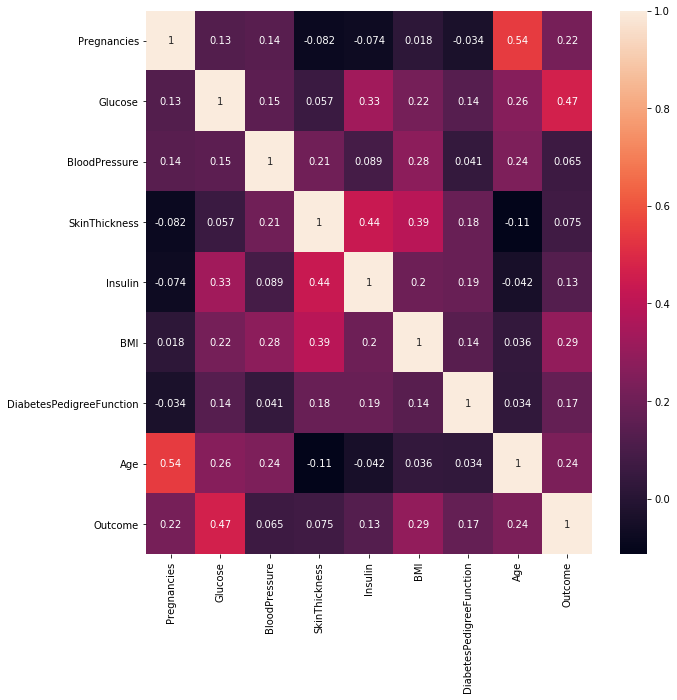

In [47]:
import seaborn as sns # Heatmap tell you the dependency of features on label.

corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)  # Glucose ,BMI and Age have highest dependency 0.49, 0.31 and 0.24 respectively.

### Observations from Heatmap high corelation between outcome and (Glucose,Age,BMI,Pregnancies,Insulin,ShinThickness)

### Split the DataFrame into x and y

In [10]:
# seperating feature(independent variable) and labels(dependent variable)
x = data.iloc[:,:-1].values  # x = data.drop(columns='Outcome',axis=1)
y = data.iloc[:,-1].values   # y = data['Outome']

In [11]:
x          # x is not in standard scale 

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
y     # y is in o and 1 output

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

### Feature Scaling (Data Scaling Techniques) --> StandardScaler

In [13]:
from sklearn.preprocessing import StandardScaler 

In [14]:
scaler = StandardScaler()          # StandardScalar transform the x value in standard form then the the x_std
x_std = scaler.fit_transform(x)
print(x_std)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


StandardScaler makes all feature values standard for future computation 

In [15]:
from sklearn.model_selection import train_test_split  # train test split the x_std and y
X = x_std
Y = y

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y ,random_state=0)
# stratify for removing chance of error that all diabetes can go to train and remaining to test / distribute data equally to train and test data

In [17]:
print(x.shape, X_train.shape , X_test.shape)

(768, 8) (614, 8) (154, 8)


# Classification model

### Logistic Classification

In [18]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train,Y_train)

C:\Users\devan\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
lr_pred = lr.predict(X_test)

### K Nearest Neighbor

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
knn_pred = knn.predict(X_test)

### SVM --> Support Vector Machine

In [22]:
from sklearn.svm import SVC
sv = SVC(kernel='rbf')
sv.fit(X_train,Y_train)

C:\Users\devan\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
sv_pred = sv.predict(X_test)

In [24]:
sv_pred.shape

(154,)

### Decision Tree 

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
dt_pred = dt.predict(X_test)

### Ramdom Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train,Y_train)

C:\Users\devan\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
rf_pred = rf.predict(X_test)

### Accuracy Score 

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix # using accuracy score to find accuracy.

### Accuracy of Logistic Regression method

In [30]:
print("Training accuracy of the Logistic Regression Model:",lr.score(X_train,Y_train))
print("Accuracy of predict value and accurate Y_test value:",accuracy_score(Y_test,lr_pred))

Training accuracy of the Logistic Regression Model: 0.7785016286644951
Accuracy of predict value and accurate Y_test value: 0.7792207792207793


In [31]:
lr_accu = confusion_matrix(Y_test,lr_pred)
lr_accu

array([[89, 11],
       [23, 31]], dtype=int64)

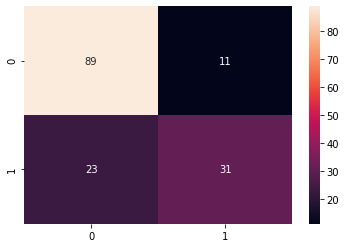

In [32]:
sns.heatmap(confusion_matrix(Y_test,lr_pred),annot=True)

### Accuracy of K-Nearest Neighbors Classifier method

In [33]:
print("Training accuracy of the KNN Model:",knn.score(X_train,Y_train))
print("Accuracy of predict value and accurate Y_test value:",accuracy_score(Y_test,knn_pred))

Training accuracy of the KNN Model: 0.8175895765472313
Accuracy of predict value and accurate Y_test value: 0.7792207792207793


In [34]:
knn_accu = confusion_matrix(Y_test,knn_pred)
knn_accu

array([[88, 12],
       [22, 32]], dtype=int64)

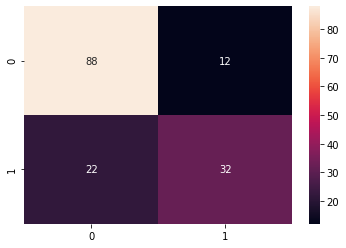

In [35]:
sns.heatmap(confusion_matrix(Y_test,knn_pred),annot=True)

### Accuracy of SVM method

In [36]:
print("Training accuracy of the SVM Model:",sv.score(X_train,Y_train))
print("Accuracy of predict value and accurate Y_test value:",accuracy_score(Y_test,sv_pred))

Training accuracy of the SVM Model: 0.8127035830618893
Accuracy of predict value and accurate Y_test value: 0.7792207792207793


In [37]:
sv_accu = confusion_matrix(Y_test,sv_pred)
sv_accu

array([[89, 11],
       [23, 31]], dtype=int64)

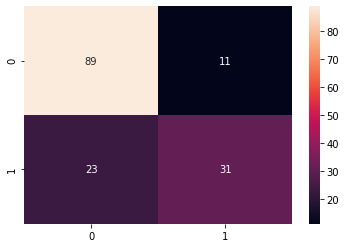

In [38]:
sns.heatmap(confusion_matrix(Y_test,sv_pred),annot=True)

### Accuracy of Decision Tree method

In [39]:
print("Training accuracy of the Decision Tree Model",dt.score(X_train,Y_train))
print("Accuracy of predict value and accurate Y_test value",accuracy_score(Y_test,dt_pred))

Training accuracy of the Decision Tree Model 1.0
Accuracy of predict value and accurate Y_test value 0.7142857142857143


In [40]:
dt_accu = confusion_matrix(Y_test,dt_pred)
dt_accu

array([[81, 19],
       [25, 29]], dtype=int64)

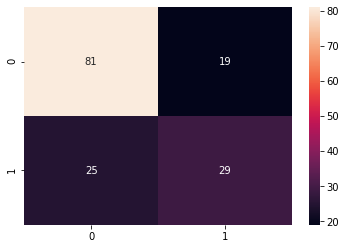

In [41]:
sns.heatmap(confusion_matrix(Y_test,dt_pred),annot=True)

### Accuracy of Random Forest method

In [42]:
# Test score of Random Forest method
print("Training accuracy of the Random Forest Model",rf.score(X_train,Y_train))
print("Accuracy of predict value and accurate Y_test value",accuracy_score(Y_test,rf_pred))

Training accuracy of the Random Forest Model 0.988599348534202
Accuracy of predict value and accurate Y_test value 0.7402597402597403


In [43]:
rf_accu = confusion_matrix(Y_test,rf_pred)
rf_accu

array([[92,  8],
       [32, 22]], dtype=int64)

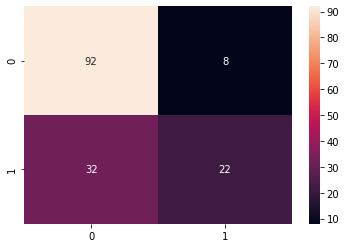

In [44]:
sns.heatmap(confusion_matrix(Y_test,rf_pred),annot=True)